# Predicting Income with Random Forests

In this project, we will be using a dataset containing census information from UCI’s Machine Learning Repository.

By using this census data with a random forest, we will try to predict whether or not a person makes more than $50,000.


Let’s begin by investigating the data available to us. Click on the file income.csv and take a look. Notice the first row of the dataset contains the names of our columns. What columns do you think might be helpful in predicting a person’s income?

You can find more detailed descriptions of the columns on UCI’s Machine Learning Repository.

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [43]:
income_data = pd.read_csv('C:\\Users\\mahak gupta\\Desktop\\income.csv', header =0)

In [44]:
income_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Take a look at one of the rows of the data we’ve imported. Print income_data.iloc[0] to see the first row in its entirety. Did this person make more than $50,000? What is the name of the column that contains that information?

In [45]:
income_data.iloc[0]    #no #income

age                            39
 workclass              State-gov
 fnlwgt                     77516
 education              Bachelors
 education-num                 13
 marital-status     Never-married
 occupation          Adm-clerical
 relationship       Not-in-family
 race                       White
 sex                         Male
 capital-gain                2174
 capital-loss                   0
 hours-per-week                40
 native-country     United-States
 income                     <=50K
Name: 0, dtype: object

There’s a small problem with our data that is a little hard to catch — every string has an extra space at the start. For example, the first row’s native-country is " United-States", but we want it to be "United-States". This is happening because in income.csv there are spaces after the commas. To fix this, we can add the parameter delimiter = ", " to our read_csv() function.

In [46]:
income_data = pd.read_csv('C:\\Users\\mahak gupta\\Desktop\\income.csv', header =0, delimiter= ', ')
print(income_data.head())

C:\Users\mahak gupta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [47]:
income_data.iloc[0]

age                          39
workclass             State-gov
fnlwgt                    77516
education             Bachelors
education-num                13
marital-status    Never-married
occupation         Adm-clerical
relationship      Not-in-family
race                      White
sex                        Male
capital-gain               2174
capital-loss                  0
hours-per-week               40
native-country    United-States
income                    <=50K
Name: 0, dtype: object

# Format The Data For Scikit-learn


Now that we have our data imported into a DataFrame, we can begin putting it in a format that our Random Forest can work with. To do this, we need to separate the labels from the rest of the data.

In [48]:
y = income_data[['income']]
X= income_data.drop(['income'], axis= 1)

In [49]:
print(y.head())
print(X.head())

  income
0  <=50K
1  <=50K
2  <=50K
3  <=50K
4  <=50K
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country  
0          2174             0              40  United-States  
1 

We’ll also want to pick which columns to use when trying to predict income. For now, let’s select "age", "capital-gain", "capital-loss", "hours-per-week", and "sex". Create a new variable named data that contains only those columns.

In [50]:
data = income_data[['age','capital-gain','capital-loss','hours-per-week', 'sex']]
labels = y

Finally, we want to split our data and labels into a training set and a test set. We’ll use the training set to build the random forest, and the test set to see how accurate it is. Use the train_test_split() function to do this.

train_test_split() returns four values — name them train_data, test_data, train_labels, and test_labels. When calling train_test_split(), it should take three arguments — data, labels and random_state = 1.

In [51]:
train_data, test_data, train_labels, test_labels = train_test_split(data,labels, random_state=1)

print(train_data.head())
print(train_labels.head())
print(test_data.head())
print(test_labels.head())

       age  capital-gain  capital-loss  hours-per-week     sex
13474   51             0             0              35  Female
28958   36             0             0              35  Female
14735   30             0             0              40    Male
13215   22             0             0              35  Female
13460   41             0             0              45    Male
      income
13474  <=50K
28958  <=50K
14735  <=50K
13215  <=50K
13460   >50K
       age  capital-gain  capital-loss  hours-per-week     sex
9646    62             0             0              66  Female
709     18             0             0              25    Male
7385    25         27828             0              50    Male
16671   33             0             0              40    Male
21932   36             0             0              40  Female
      income
9646   <=50K
709    <=50K
7385    >50K
16671  <=50K
21932  <=50K


# Create The Random Forest


We’re now ready to use this data to build and test our random forest. First, create a RandomForestClassifier and name it forest. When you create the random forest, use the parameter random_state = 1.

In [52]:
forest = RandomForestClassifier(random_state=1)

Next, we need to fit the model. We want to use the training data and training labels to train the random forest.



In [53]:
forest.fit(train_data, train_labels)

C:\Users\mahak gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: could not convert string to float: 'Female'

There seems to be a problem with using the column "sex" when training the random forest.

In that column, there are values like "Male" and "Female". Random forests can’t use columns that contain Strings — they have to be continuous values like integers or floats. We’ll solve this problem soon, but for now, let’s remove the "sex" column when creating data.

In [54]:
data = income_data[['age','capital-gain','capital-loss','hours-per-week']]
labels = y

In [55]:
train_data, test_data, train_labels, test_labels = train_test_split(data,labels, random_state=1)
forest = RandomForestClassifier(random_state=1)
forest.fit(train_data, train_labels)

C:\Users\mahak gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mahak gupta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [56]:
forest.score(test_data, test_labels)

0.82201203783319

# Changing Column Types



Now that we know the random forest works, let’s go back and try to add the "sex" column.

Recall that the problem was that this column contained strings. If we transformed those strings into integers, we could use this data!

If we take every row and make every "Male" a 0 and every "Female" a 1, we could then use the column in our random forest.

In [57]:
income_data['sex-int'] = income_data['sex'].apply(lambda row: 0 if row=='Male' else 1)

In [58]:
data = income_data[['age','capital-gain','capital-loss','hours-per-week', 'sex-int']]
labels = y

In [59]:
train_data, test_data, train_labels, test_labels = train_test_split(data,labels, random_state=1)
forest = RandomForestClassifier(random_state=1)
forest.fit(train_data, train_labels)
forest.score(test_data, test_labels)

C:\Users\mahak gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mahak gupta\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.8253285837120747

There are a couple of other columns that use strings that might be useful to use. Let’s try transforming the values in the "native-country" column.

We should first take a look at the different values that exist in the column. Print income_data["native-country"].value_counts().

In [60]:
income_data['native-country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

Since the majority of the data comes from "United-States", it might make sense to make a column where every row that contains "United-States" becomes a 0 and any other country becomes a 1. Use the syntax from creating the "sex-int" column to create a "country-int" column.

When mapping Strings to numbers like this, it is important to make sure that continuous numbers make sense. For example, it wouldn’t make much sense to map "United-States" to 0, "Germany" to 1, and "Mexico" to 2. If we did this, we’re saying that Mexico is more similar to Germany than it is to the United States.

However, if you had values in a column like "low", "medium", and "high" mapping those values to 0, 1, and 2 would make sense because their representation as Strings is also continuous.

In [61]:
income_data['country-int'] = income_data['native-country'].apply(lambda x: 0 if x=='United-States' else 1)

In [62]:
data = income_data[['age','capital-gain','capital-loss','hours-per-week', 'sex-int', 'country-int']]
labels = y

In [63]:
train_data, test_data, train_labels, test_labels = train_test_split(data,labels, random_state=1)
forest = RandomForestClassifier(random_state=1)

After calling .fit() on the forest, print forest.feature_importances_. This will show you a list of numbers where each number corresponds to the relevance of a column from the training data. Which features tend to be more relevant?

In [64]:
forest.fit(train_data, train_labels)
print(forest.feature_importances_)

[0.32211239 0.29058066 0.11846813 0.20041288 0.05870889 0.00971705]


C:\Users\mahak gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mahak gupta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Plot features and importances 


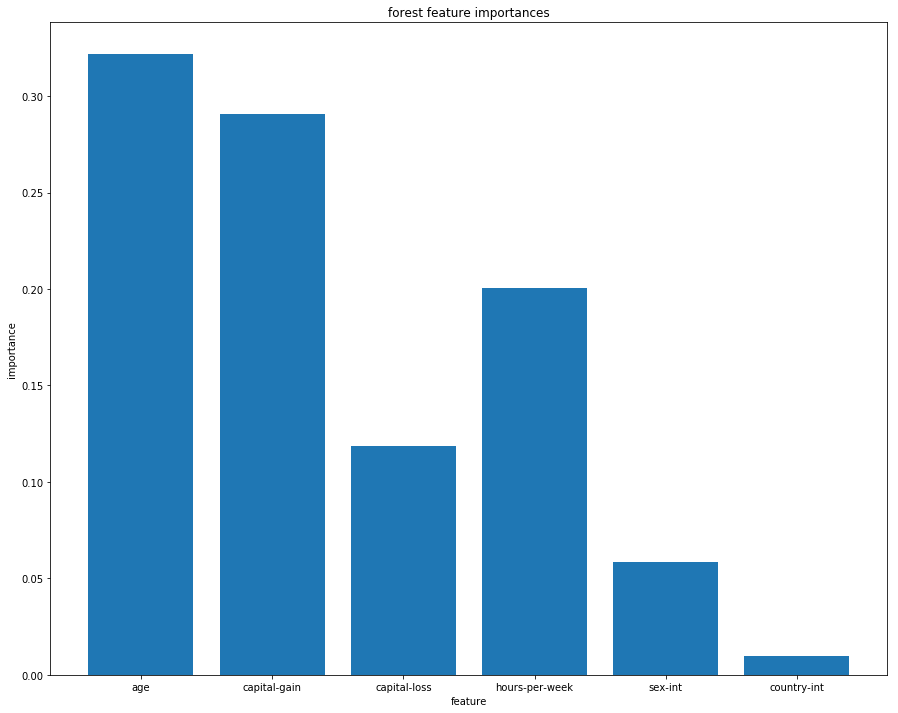

In [65]:
features = ["age", "capital-gain", "capital-loss", "hours-per-week", "sex-int", "country-int"]
data = income_data[features]
from matplotlib import pyplot as plt
plt.figure(figsize=(15,12))
plt.bar(features, forest.feature_importances_)
plt.xlabel("feature")
plt.ylabel("importance")
plt.title("forest feature importances")
plt.show()


In [66]:
forest.score(test_data, test_labels)

0.823731728288908

In [67]:
from sklearn.metrics import classification_report, confusion_matrix  

y_pred = forest.predict(test_data)
print(confusion_matrix(test_labels, y_pred))
print(classification_report(test_labels, y_pred))

[[5926  377]
 [1058  780]]
              precision    recall  f1-score   support

       <=50K       0.85      0.94      0.89      6303
        >50K       0.67      0.42      0.52      1838

   micro avg       0.82      0.82      0.82      8141
   macro avg       0.76      0.68      0.71      8141
weighted avg       0.81      0.82      0.81      8141



Create a tree.DecisionTreeClassifier, train it, test is using the same data, and compare the results to the random forest. When does the random forest do better than the single tree? When does a single tree do just as well as the forest?

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
data = income_data[['age','capital-gain','capital-loss','hours-per-week', 'sex-int', 'country-int']]
labels = y
train_data, test_data, train_labels, test_labels = train_test_split(data,labels, random_state=1)
dt_tree = DecisionTreeClassifier(random_state=1)
dt_tree.fit(train_data, train_labels)
print(dt_tree.score(test_data, test_labels))

0.8226262129959464


In [70]:
data = income_data[['age','capital-gain','capital-loss','hours-per-week', 'sex-int']]
labels = y
train_data, test_data, train_labels, test_labels = train_test_split(data,labels, random_state=1)
dt_tree = DecisionTreeClassifier(random_state=1)
dt_tree.fit(train_data, train_labels)
print(dt_tree.score(test_data, test_labels))

0.8253285837120747


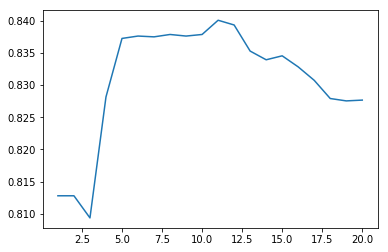

In [71]:
data = income_data[['age','capital-gain','capital-loss','hours-per-week', 'education-num']]
labels = y
train_data, test_data, train_labels, test_labels = train_test_split(data,labels, random_state=1)
scores = []
for i in range(1,21):
    tree = DecisionTreeClassifier(random_state= 1, max_depth = i)
    tree.fit(train_data, train_labels) 
    scores.append(tree.score(test_data, test_labels))
scores

plt.plot(range(1,21) , scores)
plt.show()



In [72]:
data = income_data[['age','capital-gain','capital-loss','hours-per-week', 'education-num']]
labels = y
train_data, test_data, train_labels, test_labels = train_test_split(data,labels, random_state=1)
tree = DecisionTreeClassifier(random_state= 1, max_depth = 11)
tree.fit(train_data, train_labels) 
tree.score(test_data, test_labels)


0.8400687876182287

Now that you’ve gotten the hang of transforming, adding, and removing columns from your training data, it’s time to explore on your own to try to make the best classifier possible.

As you play around with the data, here are some ideas that you might want to try:



Use some of the other columns that use continuous variables, or transform columns that use strings!

In [73]:
print(income_data['education'].value_counts().reset_index())

           index  education
0        HS-grad      10501
1   Some-college       7291
2      Bachelors       5355
3        Masters       1723
4      Assoc-voc       1382
5           11th       1175
6     Assoc-acdm       1067
7           10th        933
8        7th-8th        646
9    Prof-school        576
10           9th        514
11          12th        433
12     Doctorate        413
13       5th-6th        333
14       1st-4th        168
15     Preschool         51


In [74]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

le=LabelEncoder()

income_data['edu-int'] = le.fit_transform(income_data['education'])
income_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,sex-int,country-int,edu-int
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,0,9
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0,9
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,0,11
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1,1,9


In [75]:
le_edu_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_edu_mapping)


{'10th': 0, '11th': 1, '12th': 2, '1st-4th': 3, '5th-6th': 4, '7th-8th': 5, '9th': 6, 'Assoc-acdm': 7, 'Assoc-voc': 8, 'Bachelors': 9, 'Doctorate': 10, 'HS-grad': 11, 'Masters': 12, 'Preschool': 13, 'Prof-school': 14, 'Some-college': 15}


In [76]:
print(income_data['edu-int'].head())

0     9
1     9
2    11
3     1
4     9
Name: edu-int, dtype: int32


In [77]:
income_data.dtypes.index

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'sex-int', 'country-int', 'edu-int'],
      dtype='object')

In [78]:
income_data['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [80]:
data = income_data[['age','capital-gain','capital-loss','hours-per-week', 'sex-int', 'country-int', 'edu-int']]
labels = y
train_data, test_data, train_labels, test_labels = train_test_split(data,labels, random_state=1)
forest = RandomForestClassifier(random_state= 1)
forest.fit(train_data, train_labels) 
forest.score(test_data, test_labels)


C:\Users\mahak gupta\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mahak gupta\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.8307333251443312

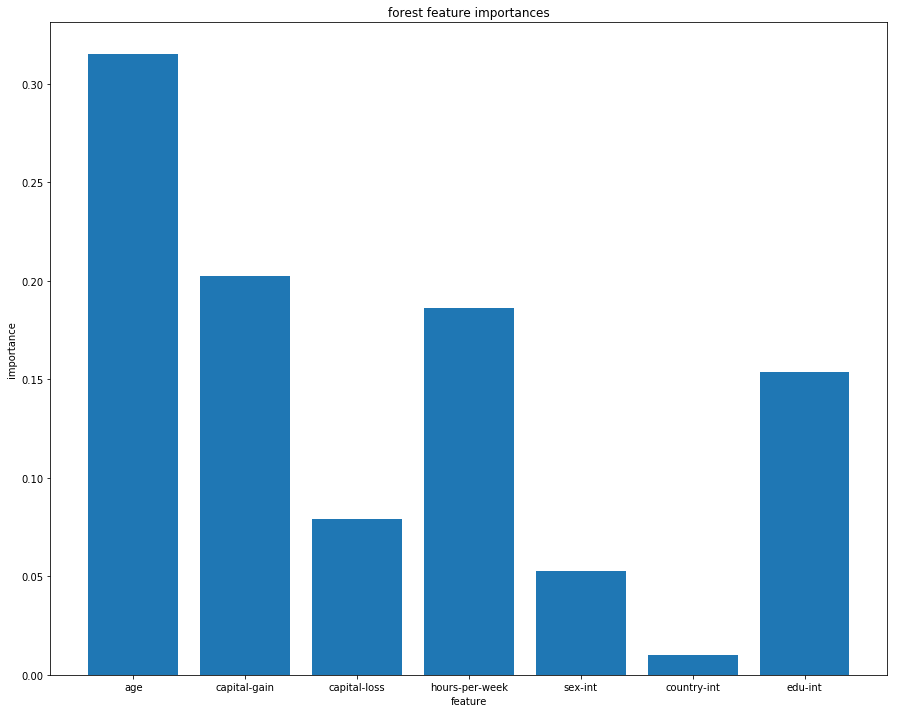

In [82]:
features = ["age", "capital-gain", "capital-loss", "hours-per-week", "sex-int", "country-int","edu-int"]
data = income_data[features]
from matplotlib import pyplot as plt
plt.figure(figsize=(15,12))
plt.bar(features, forest.feature_importances_)
plt.xlabel("feature")
plt.ylabel("importance")
plt.title("forest feature importances")
plt.show()

In [81]:
from sklearn.metrics import classification_report, confusion_matrix  

y_pred = forest.predict(test_data)
print(confusion_matrix(test_labels, y_pred))
print(classification_report(test_labels, y_pred))

[[5797  506]
 [ 872  966]]
              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.89      6303
        >50K       0.66      0.53      0.58      1838

   micro avg       0.83      0.83      0.83      8141
   macro avg       0.76      0.72      0.74      8141
weighted avg       0.82      0.83      0.82      8141

